In [132]:
# Importing required libraries: 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [245]:
# Now, load the dataset using pandas "read_csv()" function. 

ratings_data = pd.read_csv('C:/Users/Pankaj/Desktop/GitHub Projects/General/ML Projects/Rec_Sys_Project/ml-latest-small/ratings.csv')

ratings_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [249]:
# How about we can see the titles of the movies instead of just Ids. Better load movie titles and then merge it to the dataset.

movie_names = pd.read_csv('C:/Users/Pankaj/Desktop/GitHub Projects/General/ML Projects/Rec_Sys_Project/ml-latest-small/movies.csv')

movie_names.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [254]:
movie_data = pd.merge(ratings_data, movie_names, on='movieId') 

movie_data.head() 

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [255]:
movie_data.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [256]:
movie_data.shape

(100836, 6)

In [257]:
# Now we will create a dataframe which will give us average rating for each movie and the number of ratings.

movie_data.groupby('title')['rating'].mean().head()  

title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

In [258]:
# Number of ratings for each movie need to be calculated. This is needed so that we can see the relationship between the average rating of a specific movie and the number of ratings the movie has received. There are high chances that a 5 star movie was rated by just single person. This is statistically not correct to classify that movie is a 5 star movie.

# We need to set a benchmark for the minimum number of ratings as we build our recommendation engine. This can be done by groupby. Here, we group by the 'Title' column, later use the 'count' function for calculating the number of ratings each movie has received. 

movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()  

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [219]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()  

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [224]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())  

In [225]:
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count()) 

ratings_mean_count.head() 

,rating,rating_counts
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


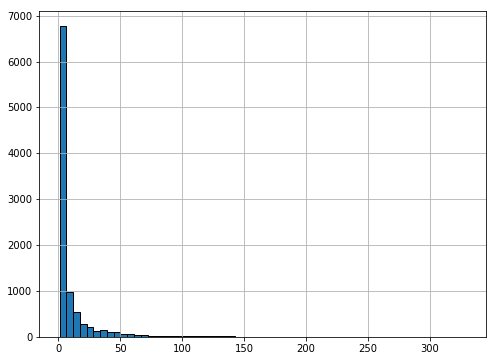

In [259]:
# Histogram can give us better visualization of the distribution of ratings, let’s plot it!

plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating_counts'].hist(bins=60) 

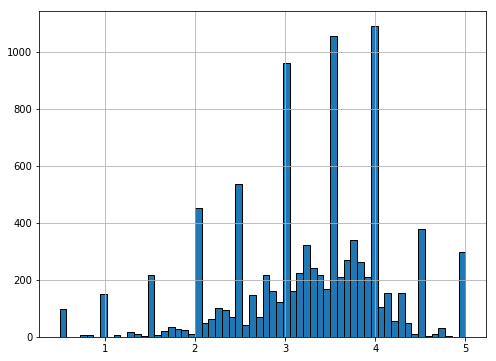

In [260]:
# At high level observation, we can see that most of the movies are rated between 2 and 4. Same way we can observe number of ratings attribute.

plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating'].hist(bins=60)  

C:\Users\Pankaj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Pankaj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 576x432 with 0 Axes>

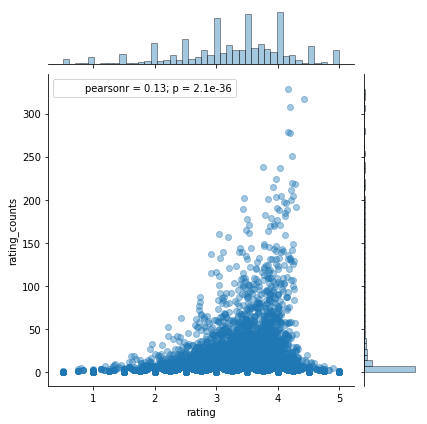

In [228]:
# The above histogram shows that most movies have fewer ratings and movies with most ratings are those which are very popular.

# Better to plot scatter plot to see the relationship between the rating of a movie and the number of ratings. 

# From the below plot, we observe the positive relationship between the average rating of a movie and the number of ratings. The plot shows that if the movie gets more ratings, the higher the average rating it gets ultimately. This is essential to take a note especially when choosing the threshold for the number of ratings per movie.

plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)  

In [261]:
# We are done with exploratory analysis! This has given us fair understating of the given dataset and it’s attributes. Let’s now move on to developing our ‘Recommender Engine’. This is going to be an ‘item-based’ engine. For moving ahead, we need to convert the dataset into matrix (‘Movie-titles’ in ‘Column’ and ‘User-Ids’ in ‘Index’ and ‘Ratings’ in ‘Values’).

# After doing this we will get a dataframe with the columns as the movie-titles and the rows as the user-ids. Each column represents all the ratings of a movie by all the users. The rating appears as NAN where a user has not rated a particular movie. We need to use this matrix for computation of the correlation between the ratings of a single movie and the rest of the movies in the matrix. For creating move matrix, pivot_table function has to be used.

user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')  

user_movie_rating.head()  

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [262]:
# Next, look for the most rated movies and choose one of them to work with. 

forrest_gump_ratings = user_movie_rating['Forrest Gump (1994)']  

forrest_gump_ratings.head() 

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [263]:
# Imagine that a user has watched one movie i.e. Forrest Gump (1994). We would like to recommend movies to this user based on this watching history. Our goal is to find for movies that are similar to Forrest Gump (1994) and the same we will recommend to this user. This can be achieved by computing the correlation between these two movies’ ratings and the ratings of the rest of the movies in the given dataset. We will have to create a dataframe with the ratings of these movies from our movie_matrix.

movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings)

corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])  
corr_forrest_gump.dropna(inplace=True)  
corr_forrest_gump.head()  

C:\Users\Pankaj\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Pankaj\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [264]:
corr_forrest_gump.sort_values('Correlation', ascending=False).head()  

,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0


In [265]:
corr_forrest_gump = corr_forrest_gump.join(ratings_mean_count['rating_counts'])  

corr_forrest_gump.head() 

,Correlation,rating_counts
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


In [267]:
# Let's compute the correlation between two dataframes. It will compute the pairwise correlation of rows/columns of two dataframe objects. We will obtain the movies that are most similar to Forrest Gump (1994) by limiting them to the movies that have minimum 100 reviews. Sort them by the correlation column and view the first 20.

# Here, notice that Forrest Gump (1994) has a perfect correlation with itself, which is very true. The next most similar movie to Forrest Gump (1994) is Good Will Hunting (1997) with a correlation of 0.484. Clearly by changing the threshold for the number of reviews we get different results from the previous way of doing it. By limiting the number of rating gives us more clear results and we can confidently recommend the above movie to someone who has already watched Forrest Gump (1994).

corr_forrest_gump[corr_forrest_gump ['rating_counts']>100].sort_values('Correlation', ascending=False).head(20)  

,Correlation,rating_counts
title,,
Forrest Gump (1994),1.000000,329
Good Will Hunting (1997),0.484042,141
Aladdin (1992),0.464268,183
American History X (1998),0.457287,129
"Truman Show, The (1998)",0.432556,125
Braveheart (1995),0.416976,237
Ferris Bueller's Day Off (1986),0.405830,109
Mrs. Doubtfire (1993),0.401408,144
Full Metal Jacket (1987),0.397241,102


In [123]:
# Very basic question about this kind of recommendation engines: what is the accuracy? This type of recommendation system may not have accuracy, as nothing is actually being trained (learned) by the algorithm. It just determines a correlation, based on ratings.